# Instructor Do: Speeding up ML algorithms with PCA

In [4]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas

from pca import pca as pca1



In [5]:
# Loading the preprocessed iris dataset
file_path = Path("Data/new_iris_data.csv")
df_iris = pd.read_csv(file_path)
df_iris.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Using PCA

In [6]:
# Standarize data with StandarScaler
iris_scaled = StandardScaler().fit_transform(df_iris)
print(iris_scaled[0:5])



[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [7]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = pca1(n_components=2)

# Get two principal components for the iris data.
iris_pca = pca.fit_transform(iris_scaled)

# after dimensionality reduction, we get as a result a smaller set of dimensions called principal components. 
# There isn’t a particular meaning assigned to each principal component; the new components are just the two main 
# dimensions of variation that contains most of the information in the original dataset.

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [13]:
# Transform PCA data to a DataFrame
df_iris_pca = pd.DataFrame(
    data=iris_pca, columns=["principal component 1", "principal component 2"]
)
df_iris_pca.head()

# You can see that principal component values have no direct relation with the values in the original dataset. 
# They can be seen as a reduced representation of the original data.

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


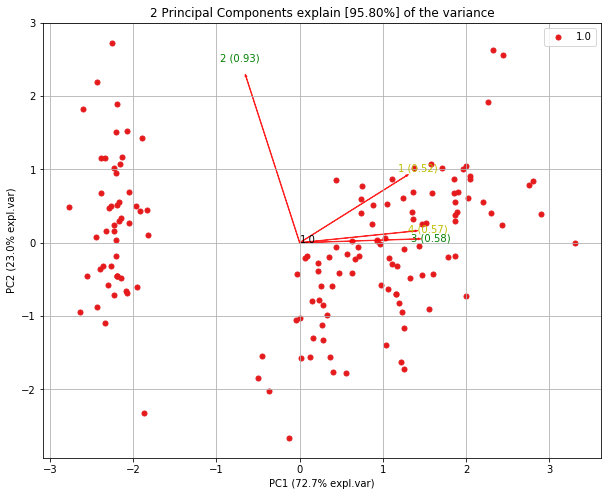

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a756a6cec8>)

In [8]:
pca.biplot(n_feat=4)

In [6]:
# Fetch the explained variance
pca.explained_variance_ratio_

# You can see that principal component values have no direct relation with the values in the original dataset. 
# They can be seen as a reduced representation of the original data.
# The trick is to sacrifice a little accuracy for simplicity. Smaller datasets are easier to 
# explore and visualize. They ease data analysis and speed up machine-learning algorithms without extraneous variables to process.

# The first principal component contains 72.77% of the variance, and the second principal component contains 23.03% of the variance. 
# Both components together contain 95.80% of the information.

array([0.72770452, 0.23030523])

## Running KMeans with PCA Data

In [7]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_iris_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")



:Curve   [k]   (inertia)

In [14]:
# Predicting clusters with k=3

# Initialize the K-Means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_iris_pca)

# Predict clusters
predictions = model.predict(df_iris_pca)

# Add the predicted class columns
df_iris_pca["class"] = model.labels_
df_iris_pca.head()



,principal component 1,principal component 2,class
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1


In [15]:
# Plotting the clusters
df_iris_pca.hvplot.scatter(
    x="principal component 1",
    y="principal component 2",
    hover_cols=["class"],
    by="class",
)


:NdOverlay   [class]
   :Scatter   [principal component 1]   (principal component 2,class)

In [16]:
model.biplot(n_feat=4)

AttributeError: 'KMeans' object has no attribute 'biplot'

In [ ]:
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

token_count(["blah", "blag2"], 10)